## 2.1 Beta distribution

In [25]:
from scipy import special, stats, integrate
import numpy as np 
import matplotlib.pyplot as plt

In [26]:
def beta(a,b,mu):
    return stats.beta.pdf(mu,a,b)

mu_list = np.linspace(0,1,100)
a, b = 8, 4

In [27]:
numer,_  = integrate.quad(lambda mu: (mu*beta(a,b,mu)),0,1)
denom,_ = integrate.quad(lambda mu: beta(a,b,mu),0,1) 
mean_beta = numer / denom
numer1,_ = integrate.quad(lambda mu: (mu**2) * beta(a,b,mu),0,1)
denom1,_ = integrate.quad(lambda mu: beta(a,b,mu),0,1)
var_beta = numer1 / denom1 - mean_beta**2

print(f"mean_beta:{mean_beta:.3f} | variance_beta:{var_beta:.3f}")

mean_beta:0.667 | variance_beta:0.017


In [28]:
def binomial(mu, N, m):
    return special.comb(N, m)*mu**m * (1-mu)**(N-m)

def norm_likelihood(mu_,N,m):
    integral ,_  = integrate.quad(lambda mu: (binomial(mu,N,m)),0,1)
    result = binomial(mu_,N,m) / integral
    return result

In [42]:
def gamma_fn(a):
    return special.gamma(a)

def post_beta(mu,m,l,a,b):
    result = mu**(m+a-1) * (1-mu)**(l+b-1) * gamma_fn(m+l+a+b) / (gamma_fn(m+a)*gamma_fn(l+b))
    return result

a_list = [0.1, 1, 2, 48]
b_list = [0.1, 1, 3, 24]

mu_list = np.linspace(0,1,100)
N = 50
datas_bin = np.random.binomial(N, 0.3, 1)
m = N - datas_bin
l = N - m
likelihood = norm_likelihood(mu_list,N,m)


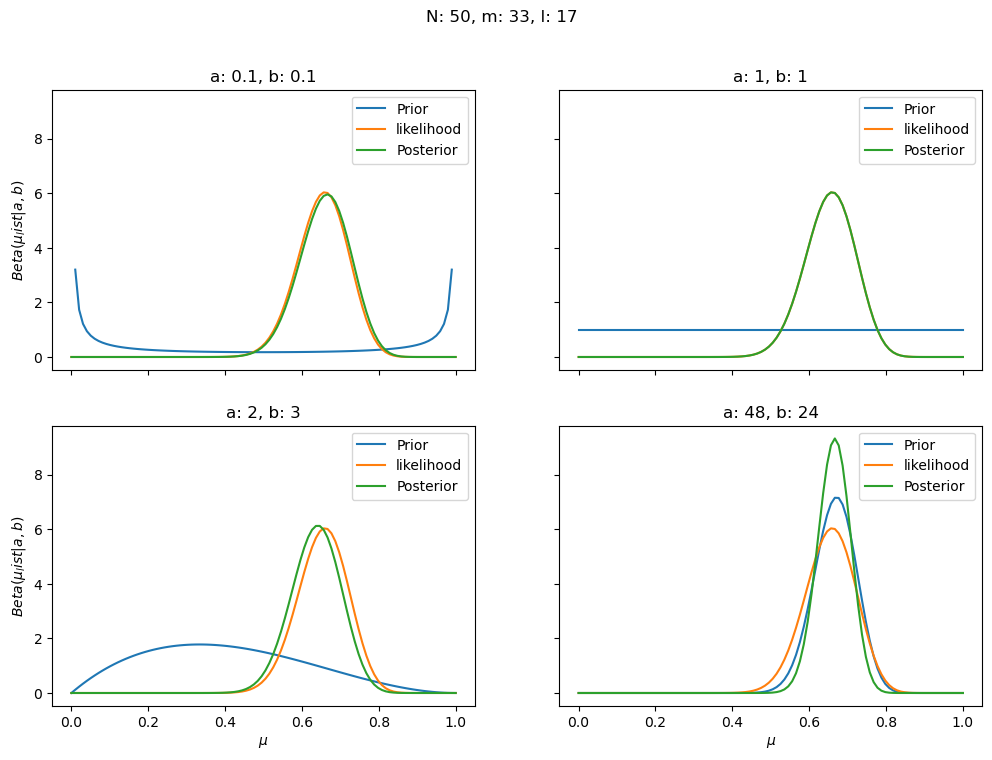

In [43]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 8))

axes[0, 0].plot(mu_list, beta(a_list[0], b_list[0], mu_list), label=f'Prior')
axes[0, 0].plot(mu_list, likelihood, label='likelihood')
axes[0, 0].plot(mu_list, post_beta(mu_list, m, l, a_list[0], b_list[0]), label=f'Posterior')
axes[0, 0].set_ylabel(r"$Beta(\mu_list|a,b)$")
axes[0, 0].legend()
axes[0, 0].set_title(f'a: {a_list[0]}, b: {b_list[0]}')
#axes[0, 0].scatter(mu_list[np.argmax(post_beta(mu_list, m, l, a_list[0], b_list[0]))],post_dist[np.argmax(post_dist)], color='red')
#axes[0, 0].annotate(f'{mu_list[np.argmax(post_dist)]:.3f}',(mu_list[np.argmax(post_dist)],post_dist[np.argmax(post_dist)]) )

axes[0, 1].plot(mu_list, beta(a_list[1], b_list[1], mu_list), label=f'Prior')
axes[0, 1].plot(mu_list, likelihood, label='likelihood')
axes[0, 1].plot(mu_list, post_beta(mu_list, m, l, a_list[1], b_list[1]), label=f'Posterior')
axes[0, 1].legend()
axes[0, 1].set_title(f'a: {a_list[1]}, b: {b_list[1]}')

axes[1, 0].plot(mu_list, beta(a_list[2], b_list[2], mu_list), label=f'Prior')
axes[1, 0].plot(mu_list, likelihood, label='likelihood')
axes[1, 0].plot(mu_list, post_beta(mu_list, m, l, a_list[2], b_list[2]), label=f'Posterior')
axes[1, 0].set_xlabel(r"$\mu$")
axes[1, 0].set_ylabel(r"$Beta(\mu_list|a,b)$")
axes[1, 0].legend()
axes[1, 0].set_title(f'a: {a_list[2]}, b: {b_list[2]}')

axes[1, 1].plot(mu_list, beta(a_list[3], b_list[3], mu_list), label=f'Prior')
axes[1, 1].plot(mu_list, likelihood, label='likelihood')
axes[1, 1].plot(mu_list, post_beta(mu_list, m, l, a_list[3], b_list[3]), label=f'Posterior')
axes[1, 1].set_xlabel(r"$\mu$")
axes[1, 1].legend()
axes[1, 1].set_title(f'a: {a_list[3]}, b: {b_list[3]}')


plt.suptitle(f"N: {N}, m: {m[0]}, l: {l[0]}")
plt.show()

In [40]:

post_dist = [post_beta(mu,m,l,a,b) for mu in mu_list]
likelihood = norm_likelihood(mu,N,m)

plt.plot(mu_list, post_dist,'-.',label='posterior',)
plt.scatter(mu_list[np.argmax(post_dist)],post_dist[np.argmax(post_dist)], color='red')
plt.annotate(f'{mu_list[np.argmax(post_dist)]:.3f}',(mu_list[np.argmax(post_dist)],post_dist[np.argmax(post_dist)]) )
plt.plot(mu_list, beta(a,b, mu_list), label='prior')
#plt.annotate(f'{mu_list[np.argmax(post_dist)]:.3f}',(mu_list[np.argmax(post_dist)],post_dist[np.argmax(post_dist)]) )

plt.plot(mu_list, norm_likelihood(mu_list,N,m), label=f'likelihood(m={m})')
plt.legend()
plt.title(f"posterior distribution for N={N}, a={a}, b={b}")
plt.xlabel(r'$\mu$')
plt.show()

NameError: name 'mu' is not defined